# JSNMF Real Data Demo

In [1]:
from JSNMF.model import JSNMF
import scvi
import scanpy as sc
import numpy as np
import anndata
import scipy.io
import torch

## h3k4me3 data

In [2]:
# load preprocessed data
mat = scipy.io.loadmat('h3k4me3_5k_10k.mat')
X1 = mat['X1']
X2 = mat['X2']
label = mat['label'][:,0]


# create AnnData object
rna = anndata.AnnData(X1.T,dtype = np.float64)
atac = anndata.AnnData(X2.T,dtype = np.float64)
rna.obs['celltype'] = label

# get the genes and peaks
genes = np.array([ val[0]  for val in mat['genes'][:,0]])
peaks = np.array([ val[0]  for val in mat['feas'][:,0]])


In [3]:
test_model = JSNMF(rna,atac)
test_model.run()

nnsvd W1 done
nnsvd W2 done
D1 done
S1 done
D2 done
S2 done
SNF starts
SNF done
Init done
number of epoch: 1
obj: tensor(2675538.7530)
number of epoch: 2
obj: tensor(2264925.5065)
number of epoch: 3
obj: tensor(2244370.1769)
number of epoch: 4
obj: tensor(2230662.9539)
number of epoch: 5
obj: tensor(2221039.6142)
number of epoch: 6
obj: tensor(2213933.1576)
number of epoch: 7
obj: tensor(2208494.5755)
number of epoch: 8
obj: tensor(2204220.4563)
number of epoch: 9
obj: tensor(2200782.5402)
number of epoch: 10
obj: tensor(2197960.1237)
number of epoch: 11
obj: tensor(2195597.7130)
number of epoch: 12
obj: tensor(2193586.6504)
number of epoch: 13
obj: tensor(2191853.0685)
number of epoch: 14
obj: tensor(2190344.8854)
number of epoch: 15
obj: tensor(2189022.6578)
number of epoch: 16
obj: tensor(2187855.0202)
number of epoch: 17
obj: tensor(2186816.6569)
number of epoch: 18
obj: tensor(2185887.0798)
number of epoch: 19
obj: tensor(2185049.6620)
number of epoch: 20
obj: tensor(2184290.8094)

## Cluster and Visualization

In [5]:
# use S  to do clustering with louvain
clu = test_model.cluster()

### Umap with clustering label

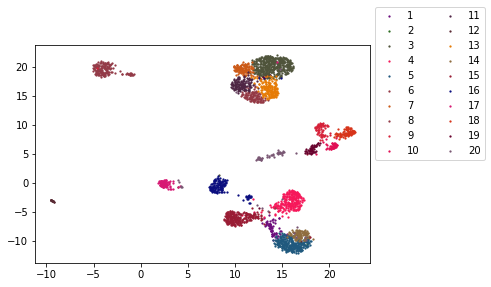

In [13]:
test_model.visualize(clu, min_dist = 0.68, n_neighbors=12)

### Umap with true label

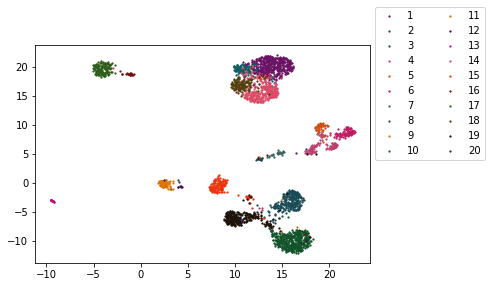

In [12]:
test_model.visualize(label,min_dist = 0.68, n_neighbors=12)

## Gene Ontology (OG) Enrichment Analysis

In [4]:
test_model.enrich_analysis(genes,peaks)

Start writing factors for gene enrichment analysis
Successfully write factor_1 for gene enrichment analysis
Successfully write factor_2 for gene enrichment analysis
Successfully write factor_3 for gene enrichment analysis
Successfully write factor_4 for gene enrichment analysis
Successfully write factor_5 for gene enrichment analysis
Successfully write factor_6 for gene enrichment analysis
Successfully write factor_7 for gene enrichment analysis
Successfully write factor_8 for gene enrichment analysis
Successfully write factor_9 for gene enrichment analysis
Successfully write factor_10 for gene enrichment analysis
Successfully write factor_11 for gene enrichment analysis
Successfully write factor_12 for gene enrichment analysis
Successfully write factor_13 for gene enrichment analysis
Successfully write factor_14 for gene enrichment analysis
Successfully write factor_15 for gene enrichment analysis
Successfully write factor_16 for gene enrichment analysis
Successfully write factor_17 f